## Imports



In [ ]:
import datetime
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install pystan~=2.14
# !pip install fbprophet

In [ ]:
import prophet
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [ ]:
# from fbprophet import Prophet
# from fbprophet.plot import add_changepoints_to_plot

In [ ]:
# this cell did not run
#import prophet
#from prophet import add_changepoints_to_plot

In [ ]:
#from fbprophet import Prophet

In [ ]:
# Kevin only, import data
googletrends_df = pd.read_csv('/content/adidas.googletrend (1).csv', skiprows = [0,1], parse_dates=["Week"])

In [ ]:
googletrends_df = pd.read_csv('/content/drive/MyDrive/Time Series Analysis Project/adidas_adspend.googletrends.weekly.csv')

In [ ]:
googletrends_df

,FIXED TIME,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,TOTAL,adidas_GoogleSearch,TOTALdiff,adidas_GoogleSearchdiff
0,2013-10-07,665.6,0.0,10.1,77.9,0,0.0,27.2,0.0,0.0,0,780.8,18,NaN,NaN
1,2013-10-14,792.6,0.0,10.1,0.0,0,222.0,5.6,0.0,0.0,0,1030.3,19,249.5,1.0
2,2013-10-21,594.2,0.0,10.1,0.0,0,300.0,9.3,0.0,0.0,0,913.6,20,-116.7,1.0
3,2013-10-28,1366.4,715.0,11.5,0.0,0,195.0,4.6,10.8,0.9,0,2304.2,19,1390.6,-1.0
4,2013-11-04,835.1,0.0,13.5,0.0,0,126.0,8.2,0.0,0.0,0,982.8,20,-1321.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2018-07-30,0.0,0.0,0.7,0.0,0,0.0,0.0,247.5,0.0,0,248.2,61,245.7,3.0
245,2018-08-20,0.0,58.0,0.0,320.5,0,0.0,0.0,0.0,0.0,0,378.5,56,130.3,-5.0
246,2018-08-27,0.0,0.0,0.0,0.0,0,0.0,0.0,295.3,0.6,0,295.9,51,-82.6,-5.0
247,2018-09-17,0.0,0.0,0.0,0.0,0,0.0,488.1,0.0,0.0,0,488.1,58,192.2,7.0


In [ ]:
googletrends_df = pd.read_csv('/content/drive/MyDrive/Time Series Analysis Project/adidas.googletrend.csv', skiprows = [0,1], parse_dates=["Week"])

In [ ]:
googletrends_df

,Week,adidas: (United States)
0,2013-10-13,18
1,2013-10-20,19
2,2013-10-27,18
3,2013-11-03,21
4,2013-11-10,20
...,...,...
255,2018-09-02,57
256,2018-09-09,52
257,2018-09-16,61
258,2018-09-23,56


# Prophet Forecast

In [ ]:
prophetdata = pd.DataFrame()
prophetdata['y'] = googletrends_df['adidas: (United States)']
prophetdata['ds'] = googletrends_df['Week']

In [ ]:
m = Prophet(changepoint_prior_scale=.1)
#m.add_country_holidays(country_name='US')
m.fit(prophetdata)
future = m.make_future_dataframe(periods=52, freq='W')
future.tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvdr8_bgl/j513rrzc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvdr8_bgl/q_19g_9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10951', 'data', 'file=/tmp/tmpvdr8_bgl/j513rrzc.json', 'init=/tmp/tmpvdr8_bgl/q_19g_9g.json', 'output', 'file=/tmp/tmpvdr8_bgl/prophet_modelagpr71e3/prophet_model-20230505160804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:08:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:08:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
307,2019-09-01
308,2019-09-08
309,2019-09-15
310,2019-09-22
311,2019-09-29


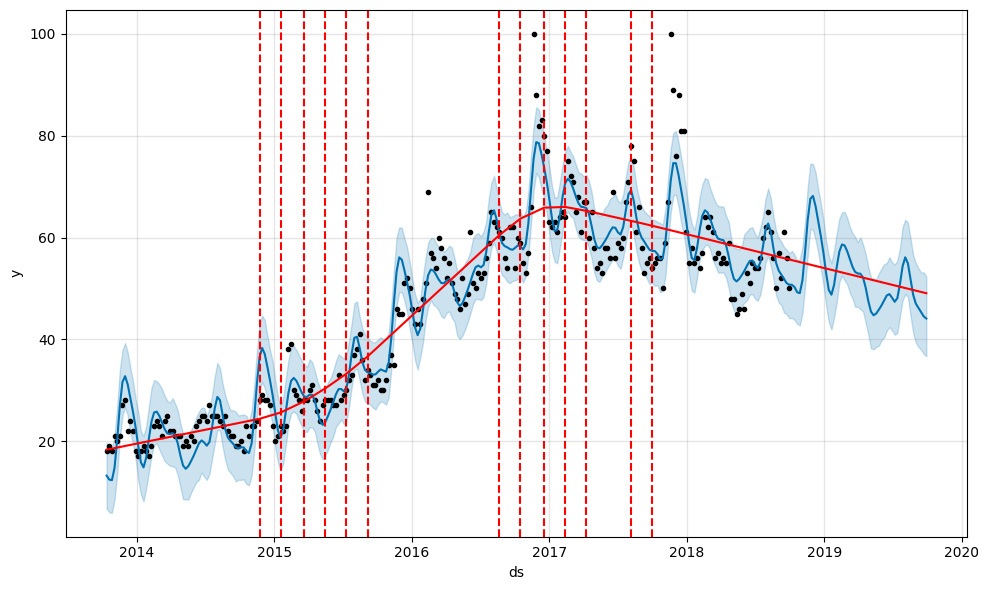

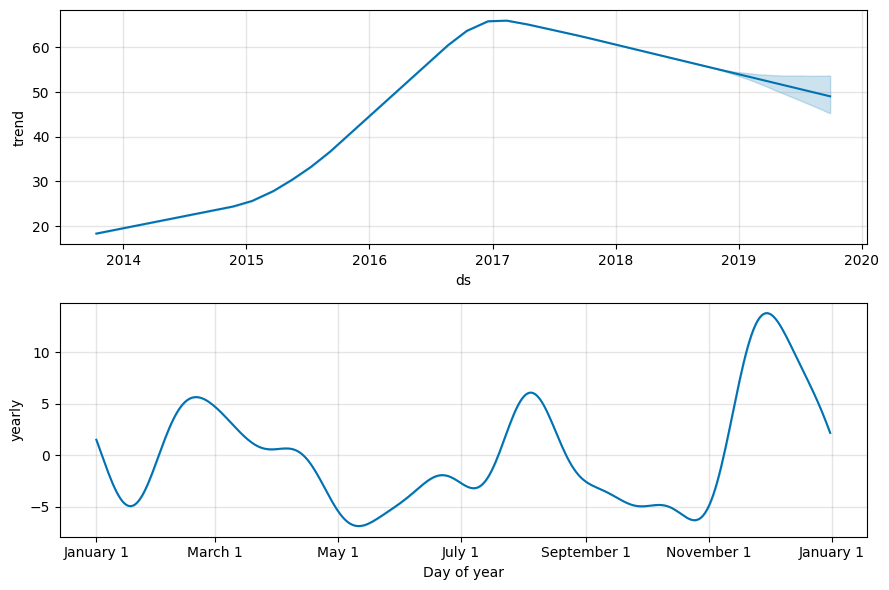

In [ ]:
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


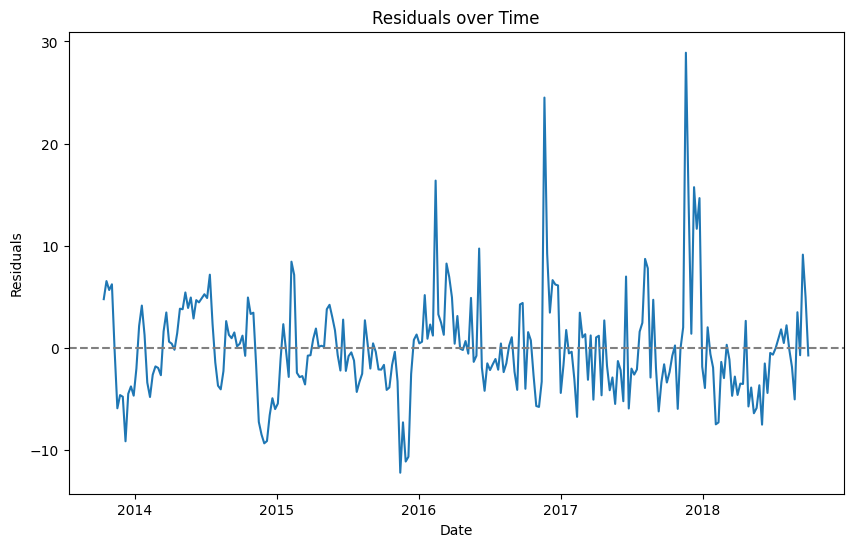

In [ ]:
# Create residual error plot from 2013 to 2018
# [Residual] = [actual value] - [prediction]
import matplotlib.pyplot as plt
actual = prophetdata['y'].values
predicted = forecast['yhat'].values[:-52] # dropped last 52 weeks because it's for 2019
# Create a residual df
dates = prophetdata['ds'].values
residuals = actual - predicted
residuals_df = pd.DataFrame({'ds': dates, 'residuals': residuals})
# plot
fig3 = plt.figure(figsize=(10, 6))
ax3 = fig3.add_subplot(111)
ax3.plot(residuals_df['ds'], residuals_df['residuals'], label='Residuals')
ax3.axhline(y=0, linestyle='--', color='grey')
ax3.set_title('Residuals over Time')
ax3.set_xlabel('Date')
ax3.set_ylabel('Residuals')
plt.show()


In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print("Durbin-Watson score: {:.2f}".format(dw))

Durbin-Watson score: 1.02


# Holidays and Changepoints in Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvdr8_bgl/j2u8lga3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvdr8_bgl/ya2vhfmw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41819', 'data', 'file=/tmp/tmpvdr8_bgl/j2u8lga3.json', 'init=/tmp/tmpvdr8_bgl/ya2vhfmw.json', 'output', 'file=/tmp/tmpvdr8_bgl/prophet_modelwp5qmt_a/prophet_model-20230505161109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


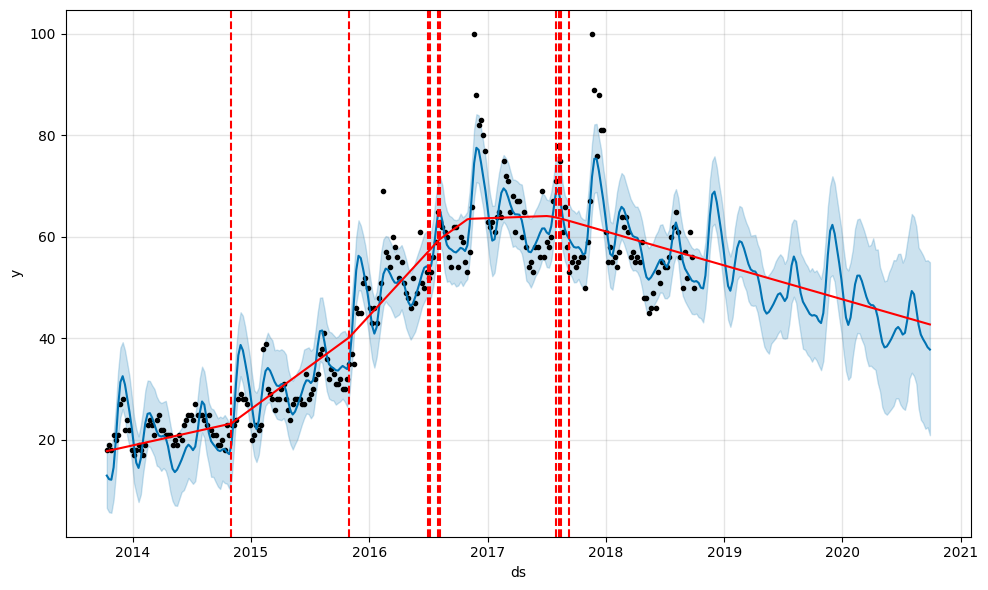

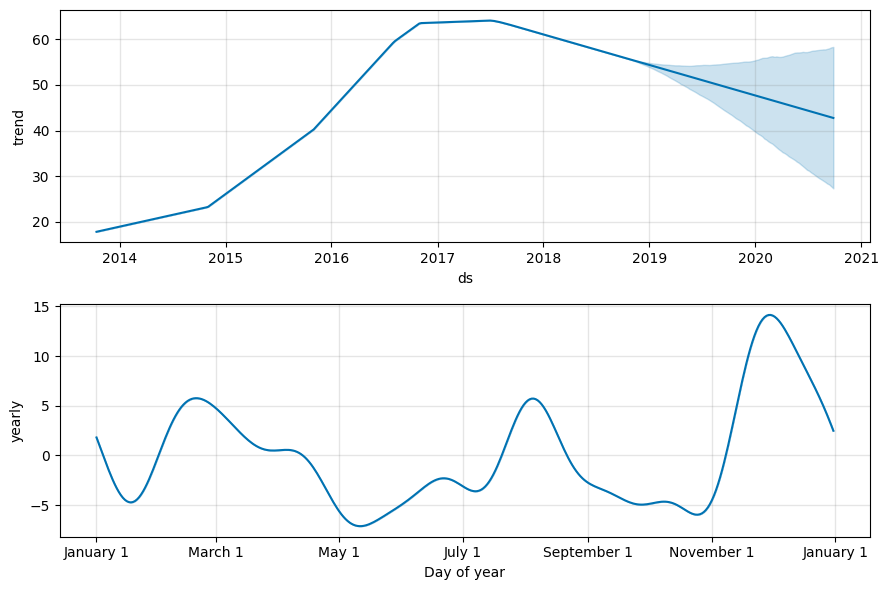

In [ ]:
changepoints = ['2013-11-01', '2014-11-01', '2015-11-01', '2016-11-01', '2017-11-01', '2016-08-01', '2016-08-08', '2016-07-01', '2016-07-08',
                '2017-08-08', '2017-08-01', 
                '2017-08-15', '2017-09-01', '2017-07-01', '2017-08-24', '2017-09-08', '2017-07-15', '2017-09-15']
m = Prophet(changepoints=changepoints)
m.fit(prophetdata)
future = m.make_future_dataframe(periods=104, freq='W')
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)

# Discussion - We talk what we discovered in the presentation
- What is the overall trend? Is the search interest for your brand steadily growing?
- What does the seasonality look like for this brand?
    - Look at weekly and monthly seasonality
      - When does search interest peak?
      - Why does search interest peak?
        - Do some secondary research.
          - Does seasonality appear to be driven by the product or consumers? 